#Analyze Customer Feedback

In this exercise, we analyze customer feedback using spaCy and TextBlob.

#Exercise #1:  Install Libraries and Modules



In [3]:
#Install Libraries and Modules
import pandas as pd
import numpy as np
import spacy, csv
from textblob import TextBlob





#Exercise #2: Read in Feedback File and Create Output File for Results

In [11]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")


#Define the path to the file containing feedback
file_path = '/content/feedback_data.csv'

# Read the file using open() with the specified parameters
with open(file_path, "r", encoding="utf-8") as file:
    # Step 2: Read the lines of the file
    feedback_data = file.readlines()

# Add code to output feedback results to a file.
output_csv_path = "feedback_analysis_results.csv"

# Prepare CSV header
csv_header = ["Feedback Index", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact Method"]

# Open CSV file for writing

with open(output_csv_path, "w", newline="", encoding="utf-8") as csv_file:
    # Create CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header
    csv_writer.writerow(csv_header)

#-----------------------------------------------------------------
# START HERE

# Process and analyze each feedback
for i,feedback in enumerate(feedback_data):
  feedbackline = []
  doc = nlp(feedback)
  blob = TextBlob(doc.text)
  feedbackline.append(i)
  feedbackline.append(blob.sentiment.polarity)
  feedbackline.append(blob.sentiment.subjectivity)
  temp = []
  for ent in doc.ents:
    temp.append(ent.label_)
  feedbackline.append(temp)
  preferred_contact_method = "chat" if "email" not in doc.text.lower() else "email"
  feedbackline.append(preferred_contact_method)
  with open(output_csv_path, "a", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(feedbackline)





# Process the narrative using spaCy



# Perform sentiment analysis using TextBlob



# Extract named entities


# Determine the preferred contact method
      #preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
      #print(f"Preferred Contact Method: {preferred_contact_method}")

# Write the results to the CSV file
      #csv_writer.writerow([idx, sentiment_polarity, sentiment_subjectivity, entities, preferred_contact_method])

#-----------------------------------------------------------------

#Exercise #3:  Exploratory Data Analysis on Customer Feedback

In [12]:
##Load results file into a Pandas Dataframe
df = pd.read_csv('/content/feedback_analysis_results.csv')


# Display the first rows of the DataFrame
df.head(4)


,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,0,0.441667,0.666667,['GPE'],email
1,1,0.136364,0.454545,['GPE'],email
2,2,0.484091,0.751136,['GPE'],chat
3,3,-0.750000,0.750000,['GPE'],email


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Feedback Index            4 non-null      int64  
 1   Sentiment Polarity        4 non-null      float64
 2   Sentiment Subjectivity    4 non-null      float64
 3   Named Entities            4 non-null      object 
 4   Preferred Contact Method  4 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 288.0+ bytes


##Plot the Preferred Contact Method

Text(0.5, 0, 'Preferred Contact Method')

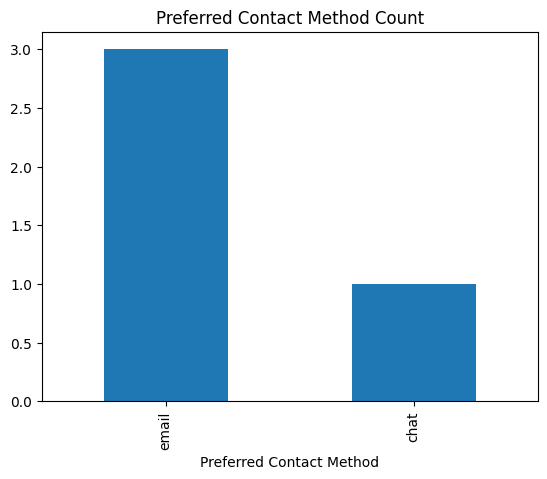

In [14]:
# Example plot: Preferred Contact Method Count
df["Preferred Contact Method"].value_counts().plot(kind="bar")
plt.title("Preferred Contact Method Count")
plt.xlabel("Preferred Contact Method")





##Plot the Sentiment Polarity and Sentiment Subjectivity

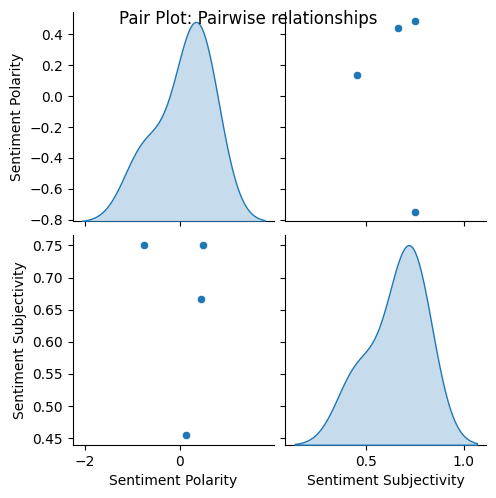

In [15]:
# Pair Plot: Pairwise relationships
sns.pairplot(data=df[['Sentiment Polarity', 'Sentiment Subjectivity']],
             diag_kind='kde')
plt.suptitle('Pair Plot: Pairwise relationships')
plt.show()